# 1. Import the Libraries 

In [1]:
#Importing important libraries
import numpy as np
import pandas as pd
import h5py
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import tensorflow as tf
from keras.models import Sequential
from keras.utils.np_utils import to_categorical
from keras.layers import Activation, Dense
from keras.layers import BatchNormalization, Dropout
from keras import optimizers

print('TensorFlow Version: ', tf.__version__)

TensorFlow Version:  2.0.0


Using TensorFlow backend.


# 2. Load the data

In [3]:
#Open the file as readonly
hdf_df = h5py.File('SVHN_single_grey1.h5','r')
hdf_df.keys()

<KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>

In [4]:
#Load the training, testing, and validation data
X_train = hdf_df['X_train']
X_test = hdf_df['X_test']
X_val = hdf_df['X_val']
y_train = hdf_df['y_train']
y_test = hdf_df['y_test']
y_val = hdf_df['y_val']

In [5]:
print('The shape of the training dataset:', X_train.shape)
print('The shape of the training (y) dataset:', y_train.shape)
print('The shape of the validation dataset:', X_val.shape)
print('The shape of the validation (y) dataset:', y_val.shape)
print('The shape of the test dataset:', X_test.shape)
print('The shape of the test (y) dataset:', y_test.shape)

The shape of the training dataset: (42000, 32, 32)
The shape of the training (y) dataset: (42000,)
The shape of the validation dataset: (60000, 32, 32)
The shape of the validation (y) dataset: (60000,)
The shape of the test dataset: (18000, 32, 32)
The shape of the test (y) dataset: (18000,)


#### Visualizing the dataset

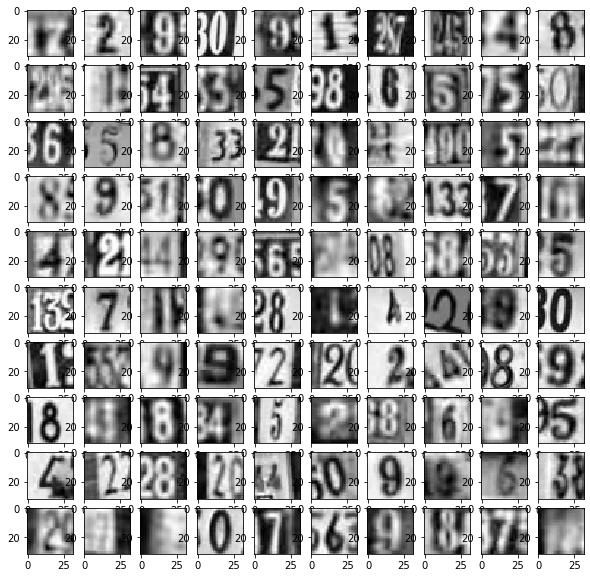

In [6]:
fig = plt.figure(figsize = (10, 10))
columns = 10
rows = 10
for i in range(1, columns * rows + 1):
    img = X_test[i]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img, cmap = 'gray')
plt.show()

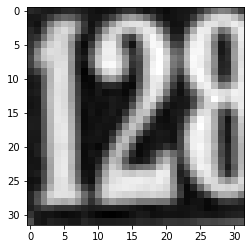

Label:  2


In [7]:
# the first number in the training dataset
plt.imshow(X_train[0], cmap = 'gray')    
plt.show()
print('Label: ', y_train[0])

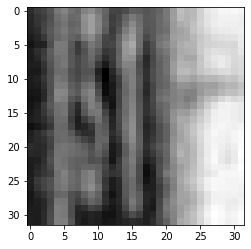

Label:  1


In [8]:
# the first number in the test dataset
plt.imshow(X_test[0], cmap = 'gray')    
plt.show()
print('Label: ', y_test[0])

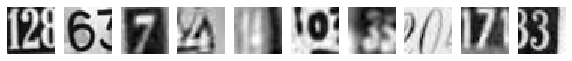

Labels for each of the above image: [2 6 7 4 4 0 3 0 7 3]


In [9]:
# visualizing the first 10 images in the dataset and their labels
plt.figure(figsize = (10, 1))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(X_train[i].reshape(32,32), cmap = 'gray')
    plt.axis('off')
plt.show()
print('Labels for each of the above image: %s' %(y_train[0:10]))

# 3. Implementing an optimal K-Nearest Neighbour Classifier

In [10]:
#Reshape data from 2D to 1D -> 32X32 to 1024
X_train = np.asarray(X_train).reshape(42000, 1024)
X_test = np.asarray(X_test).reshape(18000, 1024)
X_val = np.asarray(X_val).reshape(60000, 1024)

Normalizing the Train, Test and Validation image data from 0 - 255 to 0 - 1 to ensure that our models converge faster.

In [11]:
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255
X_val = X_val.astype('float32') / 255

In [12]:
# creating odd list of K for KNN
neighbors = list(range(1, 30, 2))

In [13]:
# empty list that will hold accuracy scores
accuracy_scores = []

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors = k, n_jobs = -1)
    knn.fit(X_train, y_train)
    # predict the response
    y_predictKNN = knn.predict(X_test)
    # evaluate accuracy
    scores = accuracy_score(y_test, y_predictKNN)
    accuracy_scores.append(scores)

# changing to misclassification error
MSE = [1 - x for x in accuracy_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print('The optimal number of neighbors is: ', optimal_k)

The optimal number of neighbors is:  27


In [14]:
# Retraining the model using the optimal k-value found above and predicting the labels on the test data
knn = KNeighborsClassifier(n_neighbors = optimal_k, n_jobs = -1)
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)

 # 4. Printing the Classification Metric Report

In [15]:
print('Classification Metric Report:\n', classification_report(y_test, predictions))
print('Confusion Matrix:\n', confusion_matrix(y_test, predictions))
print('\nAccuracy Score:', accuracy_score(y_test, predictions))

Classification Metric Report:
               precision    recall  f1-score   support

           0       0.46      0.71      0.56      1814
           1       0.46      0.73      0.56      1828
           2       0.64      0.54      0.58      1803
           3       0.47      0.43      0.45      1719
           4       0.64      0.65      0.65      1812
           5       0.53      0.40      0.45      1768
           6       0.51      0.41      0.46      1832
           7       0.71      0.62      0.66      1808
           8       0.47      0.37      0.41      1812
           9       0.55      0.44      0.49      1804

    accuracy                           0.53     18000
   macro avg       0.54      0.53      0.53     18000
weighted avg       0.54      0.53      0.53     18000

Confusion Matrix:
 [[1289   60   31   44   51   29   94   39   70  107]
 [  96 1337   54   82   80   34   33   51   32   29]
 [  90  249  971   92   48   45   30  146   45   87]
 [ 121  267  118  742   57  165 

The accuracy of the model is 53.22% which seems to be on the lower side.

#### Predicting the digits using KNN Classifier

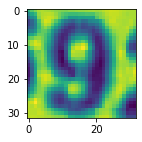

Label:  [9]


In [16]:
plt.figure(figsize = (2,2))
plt.imshow(X_test[70].reshape(32, 32))
plt.show()
image = X_test[70]
print('Label: ', knn.predict(image.reshape(1, -1)))

The KNN Classifier predicted the digit correctly.

# 5. Implementing Deep Neural Network

In [17]:
#Reshaping the data from 2D to 1D i.e., 32 X 32 = 1024
X_train = np.asarray(X_train).reshape(42000, 1024)
X_test = np.asarray(X_test).reshape(18000, 1024)
X_val = np.asarray(X_val).reshape(60000, 1024)

#### Converting output labels to binary class matrices (one-hot encoding)

In [18]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes = 10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes = 10)
y_val = tf.keras.utils.to_categorical(y_val, num_classes = 10)

In [19]:
print('First 5 examples in training dataset now are: \n', y_train[0:5])
print('\nFirst 5 examples in validation dataset now are: \n', y_val[0:5])
print('\nFirst 5 examples in test dataset now are: \n', y_test[0:5])

First 5 examples in training dataset now are: 
 [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]

First 5 examples in validation dataset now are: 
 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

First 5 examples in test dataset now are: 
 [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [20]:
print('The shape of the training dataset:', X_train.shape)
print('The shape of the training (y) dataset:', y_train.shape)
print('The shape of the validation dataset:', X_val.shape)
print('The shape of the validation (y) dataset:', y_val.shape)
print('The shape of the test dataset:', X_test.shape)
print('The shape of the test (y) dataset:', y_test.shape)

The shape of the training dataset: (42000, 1024)
The shape of the training (y) dataset: (42000, 10)
The shape of the validation dataset: (60000, 1024)
The shape of the validation (y) dataset: (60000, 10)
The shape of the test dataset: (18000, 1024)
The shape of the test (y) dataset: (18000, 10)


## Implementing Neural Network 

In [21]:
#Initialize the Artificial Neural Network Classifier
keras_model = Sequential()

In [22]:
# Input Layer
#Adding Input layer and activation functions ReLU
keras_model.add(Dense(512, kernel_initializer = 'he_normal', input_shape = (1024, )))
#Adding Activation function
keras_model.add(Activation('relu'))

#Hidden Layer 1
#Adding first Hidden layer of 256 nodes
keras_model.add(Dense(256, kernel_initializer = 'he_normal'))
#Adding Activation function
keras_model.add(Activation('relu'))

#Hidden Layer 2
#Adding second Hidden layer of 128 nodes
keras_model.add(Dense(128, kernel_initializer = 'he_normal'))
#Adding Activation function
keras_model.add(Activation('relu'))

#Hidden Layer 3
#Adding third Hidden layer of 64 nodes
keras_model.add(Dense(64, kernel_initializer = 'he_normal'))
#Adding Activation function
keras_model.add(Activation('relu'))

#Hidden Layer 4
#Adding fourth Hidden layer of 32 nodes
keras_model.add(Dense(32, kernel_initializer = 'he_normal'))
#Adding Activation function
keras_model.add(Activation('relu'))

# Output Layer
#Adding output layer which is of 10 nodes (digits)
keras_model.add(Dense(10))
#Adding Activation function
# Here, we are using softmax function because we have multiclass classsification
keras_model.add(Activation('softmax'))

In [23]:
keras_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
activation_2 (Activation)    (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
activation_3 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)               

#### Using SGD as optimizer  and Categorical Crossentropy as loss function and accuracy as the metric to monitor the accuracy of the model

In [24]:
# compiling the ANN classifier
keras_model.compile(optimizer = 'sgd', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [25]:
# Fitting the ANN to the Training data
history = keras_model.fit(X_train, y_train, validation_data = (X_val, y_val), batch_size = 200, epochs = 20, verbose = 1)

Train on 42000 samples, validate on 60000 samples
Epoch 1/20
42000/42000 [==============================] - 4s 85us/step - loss: 2.2928 - accuracy: 0.1239 - val_loss: 2.2690 - val_accuracy: 0.1600
Epoch 2/20
42000/42000 [==============================] - 3s 83us/step - loss: 2.2442 - accuracy: 0.1848 - val_loss: 2.2157 - val_accuracy: 0.2155
Epoch 3/20
42000/42000 [==============================] - 4s 84us/step - loss: 2.1790 - accuracy: 0.2324 - val_loss: 2.1340 - val_accuracy: 0.2506
Epoch 4/20
42000/42000 [==============================] - 4s 84us/step - loss: 2.0740 - accuracy: 0.2836 - val_loss: 1.9806 - val_accuracy: 0.3134
Epoch 5/20
42000/42000 [==============================] - 4s 84us/step - loss: 1.9440 - accuracy: 0.3312 - val_loss: 1.8945 - val_accuracy: 0.3441
Epoch 6/20
42000/42000 [==============================] - 4s 84us/step - loss: 1.8348 - accuracy: 0.3702 - val_loss: 1.7811 - val_accuracy: 0.3896
Epoch 7/20
42000/42000 [==============================] - 4s 84us/st

In [26]:
results = keras_model.evaluate(X_val, y_val)
print('Validation accuracy using basic Neural Network (SGD) : ', results[1])

60000/60000 [==============================] - 2s 36us/step
Validation accuracy using basic Neural Network (SGD) :  0.6819166541099548


Validation accuracy using basic Neural Network (SGD) is 68.19%.

#### Using ADAM as optimizer  and Categorical Crossentropy as loss function and accuracy as the metric to monitor the accuracy of the model

In [27]:
# compiling the ANN classifier
keras_model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [28]:
# Fitting the ANN to the Training data
history_1 = keras_model.fit(X_train, y_train, validation_data = (X_val, y_val), batch_size = 200, epochs = 20, verbose = 1)

Train on 42000 samples, validate on 60000 samples
Epoch 1/20
42000/42000 [==============================] - 4s 106us/step - loss: 1.5690 - accuracy: 0.4877 - val_loss: 1.1585 - val_accuracy: 0.6299
Epoch 2/20
42000/42000 [==============================] - 4s 104us/step - loss: 1.1249 - accuracy: 0.6472 - val_loss: 1.0718 - val_accuracy: 0.6692
Epoch 3/20
42000/42000 [==============================] - 4s 104us/step - loss: 1.0236 - accuracy: 0.6825 - val_loss: 0.9847 - val_accuracy: 0.6916
Epoch 4/20
42000/42000 [==============================] - 5s 110us/step - loss: 0.9588 - accuracy: 0.7021 - val_loss: 0.9585 - val_accuracy: 0.6972
Epoch 5/20
42000/42000 [==============================] - 5s 109us/step - loss: 0.8885 - accuracy: 0.7240 - val_loss: 0.9502 - val_accuracy: 0.6951
Epoch 6/20
42000/42000 [==============================] - 5s 107us/step - loss: 0.8468 - accuracy: 0.7366 - val_loss: 0.8502 - val_accuracy: 0.7325
Epoch 7/20
42000/42000 [==============================] - 5s 1

In [29]:
results = keras_model.evaluate(X_val, y_val)
print('Validation accuracy using basic Neural Network (ADAM) : ', results[1])

60000/60000 [==============================] - 2s 35us/step
Validation accuracy using basic Neural Network (ADAM) :  0.840666651725769


Validation accuracy using basic Neural Network (ADAM) = 84.06%

#### Now, try to change the learning rate in SGD optimizer
As, we are taking learning rate small means model will learn slowly. So, we have to increase the number of epochs.

In [30]:
#Setting the learning rate and decay in sgd
sgd = optimizers.sgd(lr = 0.0001)
# compiling the ANN classifier
keras_model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
# Fitting the ANN to the Training data
history_2 = keras_model.fit(X_train, y_train, validation_data = (X_val, y_val), batch_size = 200, epochs = 100, verbose = 1)

Train on 42000 samples, validate on 60000 samples
Epoch 1/100
42000/42000 [==============================] - 4s 84us/step - loss: 0.4412 - accuracy: 0.8600 - val_loss: 0.4828 - val_accuracy: 0.8520
Epoch 2/100
42000/42000 [==============================] - 3s 83us/step - loss: 0.4216 - accuracy: 0.8681 - val_loss: 0.4716 - val_accuracy: 0.8565
Epoch 3/100
42000/42000 [==============================] - 4s 84us/step - loss: 0.4132 - accuracy: 0.8716 - val_loss: 0.4657 - val_accuracy: 0.8580
Epoch 4/100
42000/42000 [==============================] - 4s 85us/step - loss: 0.4082 - accuracy: 0.8734 - val_loss: 0.4617 - val_accuracy: 0.8594
Epoch 5/100
42000/42000 [==============================] - 4s 84us/step - loss: 0.4046 - accuracy: 0.8748 - val_loss: 0.4587 - val_accuracy: 0.8606
Epoch 6/100
42000/42000 [==============================] - 4s 85us/step - loss: 0.4018 - accuracy: 0.8757 - val_loss: 0.4563 - val_accuracy: 0.8614
Epoch 7/100
42000/42000 [==============================] - 4s 

Epoch 56/100
42000/42000 [==============================] - 4s 94us/step - loss: 0.3746 - accuracy: 0.8861 - val_loss: 0.4322 - val_accuracy: 0.8702
Epoch 57/100
42000/42000 [==============================] - 4s 95us/step - loss: 0.3745 - accuracy: 0.8860 - val_loss: 0.4321 - val_accuracy: 0.8704
Epoch 58/100
42000/42000 [==============================] - 4s 94us/step - loss: 0.3743 - accuracy: 0.8860 - val_loss: 0.4319 - val_accuracy: 0.8705
Epoch 59/100
42000/42000 [==============================] - 4s 93us/step - loss: 0.3741 - accuracy: 0.8862 - val_loss: 0.4317 - val_accuracy: 0.8706
Epoch 60/100
42000/42000 [==============================] - 4s 93us/step - loss: 0.3739 - accuracy: 0.8864 - val_loss: 0.4316 - val_accuracy: 0.8709
Epoch 61/100
42000/42000 [==============================] - 4s 94us/step - loss: 0.3738 - accuracy: 0.8865 - val_loss: 0.4314 - val_accuracy: 0.8709
Epoch 62/100
42000/42000 [==============================] - 4s 93us/step - loss: 0.3736 - accuracy: 0.8865

In [31]:
results_sgd = keras_model.evaluate(X_val, y_val)
print('Validation accuracy using learning rate = 0.0001 (SGD) : ', results_sgd[1])

60000/60000 [==============================] - 2s 37us/step
Validation accuracy using learning rate = 0.0001 (SGD) :  0.8726833462715149


* The accuracy of the model on validation data using SGD with learning rate = 0.0001 has improved from 68.19% to 87.27%.

In [32]:
#Store the accuracy results for each model in a dataframe for final comparison
results_on_val = pd.DataFrame({'Method':['Basic NN (SGD)'], 'Accuracy': round((results_sgd[1] * 100), 2)}, index={'1'})
results_on_val = results_on_val[['Method', 'Accuracy']]
results_on_val

,Method,Accuracy
1,Basic NN (SGD),87.27


#### Now, let's try to change the learning rate in ADAM optimizer
As, we are taking learning rate small means model will learn slowly. So, we have to take more number of epochs.

In [33]:
#Setting the learning rate and decay in adam
adam = optimizers.adam(lr = 0.0001)
# compiling the ANN classifier
keras_model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
# Fitting the ANN to the Training data
history_3 = keras_model.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size = 200, epochs = 100, verbose = 1)

Train on 42000 samples, validate on 60000 samples
Epoch 1/100
42000/42000 [==============================] - 4s 104us/step - loss: 0.3830 - accuracy: 0.8822 - val_loss: 0.4273 - val_accuracy: 0.8714
Epoch 2/100
42000/42000 [==============================] - 4s 102us/step - loss: 0.3737 - accuracy: 0.8858 - val_loss: 0.4206 - val_accuracy: 0.8740
Epoch 3/100
42000/42000 [==============================] - 4s 105us/step - loss: 0.3677 - accuracy: 0.8880 - val_loss: 0.4213 - val_accuracy: 0.8734
Epoch 4/100
42000/42000 [==============================] - 4s 105us/step - loss: 0.3601 - accuracy: 0.8893 - val_loss: 0.4185 - val_accuracy: 0.8749
Epoch 5/100
42000/42000 [==============================] - 4s 104us/step - loss: 0.3552 - accuracy: 0.8901 - val_loss: 0.4145 - val_accuracy: 0.8752
Epoch 6/100
42000/42000 [==============================] - 4s 105us/step - loss: 0.3525 - accuracy: 0.8911 - val_loss: 0.4123 - val_accuracy: 0.8765
Epoch 7/100
42000/42000 [==============================]

In [34]:
results_adam = keras_model.evaluate(X_val, y_val)
print('Validation accuracy using learning rate = 0.0001 (ADAM) : ', results_adam[1])

60000/60000 [==============================] - 2s 38us/step
Validation accuracy using learning rate = 0.0001 (ADAM) :  0.9336833357810974


* The accuracy of the model on validation data using ADAM with learning rate = 0.0001 has shown significant improvement from 84.06% to 93.37%

In [35]:
tempResultsDf = pd.DataFrame({'Method':['Basic NN (Adam)'], 'Accuracy': round((results_adam[1] * 100), 2)}, index={'2'})
results_on_val= pd.concat([results_on_val, tempResultsDf])
results_on_val = results_on_val[['Method', 'Accuracy']]
results_on_val

,Method,Accuracy
1,Basic NN (SGD),87.27
2,Basic NN (Adam),93.37


## Implementing (vectorized) backpropagation (cost stochastic gradient descent, cross entropy loss, cost functions)

In [36]:
#Initialize the Artificial Neural Network Classifier
keras_model_2 = Sequential()

In [37]:
# Input Layer
#Adding Input layer and activation functions ReLU
keras_model_2.add(Dense(512, kernel_initializer = 'he_normal', input_shape = (1024, )))

#Adding Activation function
keras_model_2.add(Activation('relu'))

#Hidden Layer 1
#Adding first Hidden layer of 256 nodes
keras_model_2.add(Dense(256, kernel_initializer = 'he_normal'))

#Adding Activation function
keras_model_2.add(Activation('relu'))

#Hidden Layer 2
#Adding second Hidden layer of 128 nodes
keras_model_2.add(Dense(128, kernel_initializer = 'he_normal'))

#Adding Activation function
keras_model_2.add(Activation('relu'))

#Hidden Layer 3
#Adding third Hidden layer of 64 nodes
keras_model_2.add(Dense(64, kernel_initializer = 'he_normal'))

#Adding Activation function
keras_model_2.add(Activation('relu'))

#Hidden Layer 4
#Adding fourth Hidden layer of 32 nodes
keras_model_2.add(Dense(32, kernel_initializer = 'he_normal'))

#Adding Activation function
keras_model_2.add(Activation('relu'))

# Output Layer
#Adding output layer which is of 10 nodes (digits)
keras_model_2.add(Dense(10))
#Adding Activation function
# Here, we are using softmax function because we have multiclass classsification
keras_model_2.add(Activation('softmax'))

In [38]:
keras_model_2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 512)               524800    
_________________________________________________________________
activation_7 (Activation)    (None, 512)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 256)               131328    
_________________________________________________________________
activation_8 (Activation)    (None, 256)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 128)               32896     
_________________________________________________________________
activation_9 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 64)               

#### Using SGD optimizer
* learning rate = 0.001

In [39]:
#Setting the learning rate in sgd
sgd = optimizers.sgd(lr = 0.001)
# compiling the ANN classifier
keras_model_2.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [40]:
# Fitting the ANN to the Training data
history_sgd_bp = keras_model_2.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size = 200, epochs = 100, verbose = 1)

Train on 42000 samples, validate on 60000 samples
Epoch 1/100
42000/42000 [==============================] - 4s 86us/step - loss: 2.3183 - accuracy: 0.1068 - val_loss: 2.3031 - val_accuracy: 0.1136
Epoch 2/100
42000/42000 [==============================] - 4s 93us/step - loss: 2.3002 - accuracy: 0.1198 - val_loss: 2.2974 - val_accuracy: 0.1269
Epoch 3/100
42000/42000 [==============================] - 4s 86us/step - loss: 2.2952 - accuracy: 0.1294 - val_loss: 2.2931 - val_accuracy: 0.1353
Epoch 4/100
42000/42000 [==============================] - 4s 88us/step - loss: 2.2915 - accuracy: 0.1356 - val_loss: 2.2898 - val_accuracy: 0.1371
Epoch 5/100
42000/42000 [==============================] - 4s 87us/step - loss: 2.2882 - accuracy: 0.1395 - val_loss: 2.2866 - val_accuracy: 0.1465
Epoch 6/100
42000/42000 [==============================] - 4s 86us/step - loss: 2.2850 - accuracy: 0.1450 - val_loss: 2.2833 - val_accuracy: 0.1507
Epoch 7/100
42000/42000 [==============================] - 4s 

Epoch 56/100
42000/42000 [==============================] - 4s 95us/step - loss: 1.8331 - accuracy: 0.4222 - val_loss: 1.8216 - val_accuracy: 0.4285
Epoch 57/100
42000/42000 [==============================] - 4s 92us/step - loss: 1.8138 - accuracy: 0.4336 - val_loss: 1.8023 - val_accuracy: 0.4395
Epoch 58/100
42000/42000 [==============================] - 4s 92us/step - loss: 1.7940 - accuracy: 0.4410 - val_loss: 1.7823 - val_accuracy: 0.4432
Epoch 59/100
42000/42000 [==============================] - 4s 93us/step - loss: 1.7738 - accuracy: 0.4500 - val_loss: 1.7612 - val_accuracy: 0.4525
Epoch 60/100
42000/42000 [==============================] - 4s 95us/step - loss: 1.7530 - accuracy: 0.4596 - val_loss: 1.7399 - val_accuracy: 0.4647
Epoch 61/100
42000/42000 [==============================] - 4s 104us/step - loss: 1.7325 - accuracy: 0.4669 - val_loss: 1.7198 - val_accuracy: 0.4734
Epoch 62/100
42000/42000 [==============================] - 4s 93us/step - loss: 1.7117 - accuracy: 0.475

In [41]:
results_2 = keras_model_2.evaluate(X_val, y_val)
print('Validation accuracy using SGD : ', results_2[1])

60000/60000 [==============================] - 2s 40us/step
Validation accuracy using SGD :  0.6200666427612305


In [42]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['NN_SGD'], 'Accuracy': round((results_2[1] * 100), 2)}, index={'3'})
results_on_val= pd.concat([results_on_val, tempResultsDf])
results_on_val = results_on_val[['Method', 'Accuracy']]
results_on_val

,Method,Accuracy
1,Basic NN (SGD),87.27
2,Basic NN (Adam),93.37
3,NN_SGD,62.01


## Implementing batch normalization for training the neural network 

In [43]:
##Initialize the Artificial Neural Network Classifier
keras_model_3 = Sequential()

#### Adding Batch normalization layer 

In [44]:
# Input Layer
#Adding Input layer and activation functions ReLU
keras_model_3.add(Dense(512, kernel_initializer = 'he_normal', input_shape = (1024, )))
#Adding BatchNormalization Layer
keras_model_3.add(BatchNormalization())
#Adding Activation function
keras_model_3.add(Activation('relu'))

#Hidden Layer 1
#Adding first Hidden layer of 256 nodes
keras_model_3.add(Dense(256, kernel_initializer = 'he_normal'))
#Adding BatchNormalization Layer
keras_model_3.add(BatchNormalization())
#Adding Activation function
keras_model_3.add(Activation('relu'))

#Hidden Layer 2
#Adding second Hidden layer of 128 nodes
keras_model_3.add(Dense(128, kernel_initializer = 'he_normal'))
#Adding BatchNormalization Layer
keras_model_3.add(BatchNormalization())
#Adding Activation function
keras_model_3.add(Activation('relu'))

#Hidden Layer 3
#Adding third Hidden layer of 64 nodes
keras_model_3.add(Dense(64, kernel_initializer = 'he_normal'))
#Adding BatchNormalization Layer
keras_model_3.add(BatchNormalization())
#Adding Activation function
keras_model_3.add(Activation('relu'))

#Hidden Layer 4
#Adding fourth Hidden layer of 32 nodes
keras_model_3.add(Dense(32, kernel_initializer = 'he_normal'))
#Adding BatchNormalization Layer
keras_model_3.add(BatchNormalization())
#Adding Activation function
keras_model_3.add(Activation('relu'))

# Output Layer
#Adding output layer which is of 10 nodes (digits)
keras_model_3.add(Dense(10))
#Adding Activation function
# Here, we are using softmax function because we have multiclass classsification
keras_model_3.add(Activation('softmax'))

In [45]:
keras_model_3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 512)               524800    
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
activation_13 (Activation)   (None, 512)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
activation_14 (Activation)   (None, 256)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 128)              

#### Using ADAM optimizer.
* learning rate= 0.0001


In [46]:
#Setting the learning rate and decay in adam
adam = optimizers.adam(lr = 0.0001)
# compiling the ANN classifier
keras_model_3.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [47]:
# Fitting the ANN to the Training data
history_4 = keras_model_3.fit(X_train, y_train, validation_data = (X_val,y_val), batch_size = 200, epochs = 100, verbose = 1)

Train on 42000 samples, validate on 60000 samples
Epoch 1/100
42000/42000 [==============================] - 6s 153us/step - loss: 2.1068 - accuracy: 0.2580 - val_loss: 2.0780 - val_accuracy: 0.2804
Epoch 2/100
42000/42000 [==============================] - 5s 130us/step - loss: 1.5653 - accuracy: 0.5206 - val_loss: 1.6448 - val_accuracy: 0.4780
Epoch 3/100
42000/42000 [==============================] - 5s 131us/step - loss: 1.2848 - accuracy: 0.6358 - val_loss: 1.4528 - val_accuracy: 0.5438
Epoch 4/100
42000/42000 [==============================] - 5s 130us/step - loss: 1.0985 - accuracy: 0.6944 - val_loss: 1.2189 - val_accuracy: 0.6541
Epoch 5/100
42000/42000 [==============================] - 6s 132us/step - loss: 0.9651 - accuracy: 0.7310 - val_loss: 1.0594 - val_accuracy: 0.6895
Epoch 6/100
42000/42000 [==============================] - 6s 134us/step - loss: 0.8608 - accuracy: 0.7567 - val_loss: 1.0436 - val_accuracy: 0.6756
Epoch 7/100
42000/42000 [==============================]

In [49]:
results_1 = keras_model_3.evaluate(X_val, y_val)
print('Validation accuracy using BatchNormalization ANN ADAM : ', results_1[1])

60000/60000 [==============================] - 3s 47us/step
Validation accuracy using BatchNormalization ANN ADAM :  0.8305833339691162


### Comparison of Accuracy Results of each Neural Network model on the Validation Data

In [50]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['NN_BatchNormalization_ADAM'], 'Accuracy': round((results_1[1] * 100), 2)}, index={'4'})
results_on_val= pd.concat([results_on_val, tempResultsDf])
results_on_val = results_on_val[['Method', 'Accuracy']]
results_on_val

,Method,Accuracy
1,Basic NN (SGD),87.27
2,Basic NN (Adam),93.37
3,NN_SGD,62.01
4,NN_BatchNormalization_ADAM,83.06


## Testing NN on Test Data 

In [51]:
history_f = keras_model_3.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size = 200, epochs = 100, verbose = 1)

Train on 42000 samples, validate on 18000 samples
Epoch 1/100
42000/42000 [==============================] - 4s 98us/step - loss: 0.0447 - accuracy: 0.9864 - val_loss: 1.1598 - val_accuracy: 0.7516
Epoch 2/100
42000/42000 [==============================] - 4s 99us/step - loss: 0.0437 - accuracy: 0.9863 - val_loss: 1.3301 - val_accuracy: 0.7458
Epoch 3/100
42000/42000 [==============================] - 4s 98us/step - loss: 0.0441 - accuracy: 0.9868 - val_loss: 1.2838 - val_accuracy: 0.7564
Epoch 4/100
42000/42000 [==============================] - 4s 98us/step - loss: 0.0400 - accuracy: 0.9881 - val_loss: 1.7077 - val_accuracy: 0.7012
Epoch 5/100
42000/42000 [==============================] - 4s 98us/step - loss: 0.0462 - accuracy: 0.9857 - val_loss: 1.3569 - val_accuracy: 0.7438
Epoch 6/100
42000/42000 [==============================] - 4s 98us/step - loss: 0.0403 - accuracy: 0.9880 - val_loss: 1.4464 - val_accuracy: 0.7269
Epoch 7/100
42000/42000 [==============================] - 4s 

In [52]:
results_f = keras_model_3.evaluate(X_test, y_test)
print('Test accuracy using Batch Normalization (ADAM) : ', results_f[1])

18000/18000 [==============================] - 1s 48us/step
Test accuracy using Batch Normalization (ADAM) :  0.7472777962684631


#### Predicting the digits using Neural Network classifier on test data

#### Image 1

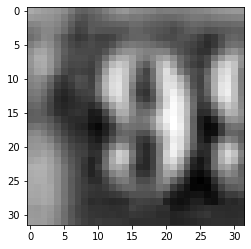

In [53]:
#Showing the image
plt.imshow(X_test[5].reshape(32,32), cmap = 'gray')

In [54]:
#Predicting the digits
print('Label: ', keras_model_3.predict_classes(X_test)[5])

Label:  9


#### Image 2

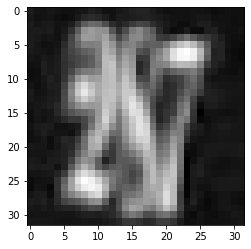

In [55]:
#Showing the image
plt.imshow(X_test[7].reshape(32,32), cmap = 'gray')

In [56]:
#Predicting the digits
print('Label: ', keras_model_3.predict_classes(X_test)[7])

Label:  5


#### Image 3

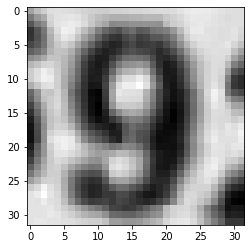

In [57]:
#Showing the image
plt.imshow(X_test[70].reshape(32,32), cmap = 'gray')

In [58]:
#Predicting the digits
print('Label: ', keras_model_3.predict_classes(X_test)[70])

Label:  9


In [59]:
#Predicting for all images
y_pred = keras_model_3.predict_classes(X_test)
print(y_pred)

[0 7 2 ... 7 9 2]


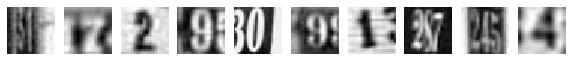

Labels for each of the above image: [0 7 2 9 0 9 2 5 1 4]


In [60]:
#visualising the first 10 images of the test data and printing their labels
plt.figure(figsize = (10, 1))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(X_test[i].reshape(32,32), cmap = 'gray')
    plt.axis('off')
plt.show()
print('Labels for each of the above image: %s' %(y_pred[0:10]))

In the above code we saw that the Neural Network was unable to predict the label of first, seventh, eigth and ninth images correctly. The accuracy of the above Neural Network is 74.72% which is considerably higher than what was achieved using KNN which had an accuracy of 52.33%.

# Differences and trade-offs between traditional KNN and NN classifiers with the help of classification metrics 

* KNN requires more time to find the nearest neigbhors when compared to the time to train the model. However, Neural Network takes more time to train the model.
* In KNN, we have only one hyperparameter neighbor (k) while in Neural Network we have so many hyperparameters (Hidden Layers, Hidden Units, Learning Rate, Number of Epochs, Activation Functions, Optimizers).
* Once a Neural Network is trained, the training data is no longer needed to produce new predictions. This is obviously not the case with KNN.
* Once a Neural Network is trained on one task, its parameters can be used as a good initializer for another (similar) task. This is a form of transfer learning that cannot be achieved with KNN.
* KNN classification metrics shows that the accuracy is 52.33%.
* Using Neural Network with BatchNormalization using ADAM as optimizer we get 74.27% accuracy. We have predicted the classification of the images correctly.